# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
!pip install citipy

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#starting url for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

#print to logger
print("Beginning Data Retrieval")
print("-" * 15)

# Create counters
record_count = 1
set_count = 1

# loop through all the cities in out list
for index, city in enumerate(cities):

    # Group cities in sets of 50 for logging purpose
    if (index % 50 == 0 and index >=50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url record and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API reqest for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        #break
        # Extract out max temp and humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        #print("lat", city_lat) 
        city_lng = city_weather["coord"]["lon"]
        #print("coord", "lon", city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        #print("main", "temp_max", city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
        #print("Clouds", "all", city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        #print("Clouds", "all", city_clouds)
        city_wind = city_weather["wind"]["speed"]
        #print("Wind", "speed", city_wind)
        city_country = city_weather["sys"]["country"]
        #print("sys", "country", city_country)
        city_date = city_weather["dt"]
        #print("dt", city_date)
        
        # Append the City info into city data list
        city_data.append({
            "City":city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date 
        })
        
    except:
        print("City not found, Skipping...")
        pass
# Indicate that Data loading is complete
print("----------------")
print("Data Retrieval Complete")
print("----------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | kodinsk
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | coulihaut
City not found, Skipping...
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | bismarck
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | oktyabrskoye
Processing Record 10 of Set 1 | belushya guba
City not found, Skipping...
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | lazurne
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | northam
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | bud
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Se

Processing Record 38 of Set 4 | tiznit
Processing Record 39 of Set 4 | saquarema
Processing Record 40 of Set 4 | nebolchi
Processing Record 41 of Set 4 | nileshwar
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | egvekinot
Processing Record 47 of Set 4 | luena
Processing Record 48 of Set 4 | balimo
City not found, Skipping...
Processing Record 49 of Set 4 | wobulenzi
Processing Record 0 of Set 5 | ribeira grande
Processing Record 1 of Set 5 | benicia
Processing Record 2 of Set 5 | tondano
Processing Record 3 of Set 5 | puri
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | nola
Processing Record 6 of Set 5 | pangkalanbuun
Processing Record 7 of Set 5 | boende
Processing Record 8 of Set 5 | kyrksaeterora
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | islamkot
Processing Record 11 of Set 5 | vilyuysk
Proce

Processing Record 30 of Set 8 | hrebinka
Processing Record 31 of Set 8 | sofiysk
City not found, Skipping...
Processing Record 32 of Set 8 | yuanli
Processing Record 33 of Set 8 | gangotri
City not found, Skipping...
Processing Record 34 of Set 8 | babanusah
City not found, Skipping...
Processing Record 35 of Set 8 | mato verde
Processing Record 36 of Set 8 | ovalle
Processing Record 37 of Set 8 | zlatoustovsk
City not found, Skipping...
Processing Record 38 of Set 8 | anloga
Processing Record 39 of Set 8 | marovoay
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | marion
Processing Record 42 of Set 8 | buenos aires
Processing Record 43 of Set 8 | krasnoselkup
Processing Record 44 of Set 8 | adre
Processing Record 45 of Set 8 | jatibonico
Processing Record 46 of Set 8 | iskateley
Processing Record 47 of Set 8 | ballina
Processing Record 48 of Set 8 | dubrovka
Processing Record 49 of Set 8 | manokwari
Processing Record 0 of Set 9 | bubaque
Processing Record 1 of S

Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | iquique
Processing Record 17 of Set 12 | unai
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | dakar
Processing Record 20 of Set 12 | santa maria
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | santa isabel
Processing Record 23 of Set 12 | pitimbu
Processing Record 24 of Set 12 | beloha
Processing Record 25 of Set 12 | luebo
Processing Record 26 of Set 12 | mamallapuram
Processing Record 27 of Set 12 | nioro
Processing Record 28 of Set 12 | mackenzie
Processing Record 29 of Set 12 | nan
Processing Record 30 of Set 12 | gumushane
City not found, Skipping...
Processing Record 31 of Set 12 | zhigansk
Processing Record 32 of Set 12 | hashtrud
Processing Record 33 of Set 12 | zalantun
Processing Record 34 of Set 12 | tumannyy
City not found, Skipping...
Processing Record 35 of Set 12 | villacidro
Processing Record 36 of Set 12 | soyo
Processing Record 37 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSON into pandas
city_data_df = pd.DataFrame(city_data)

# Extract relevant field from the dataframe
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [11]:
# Display the City DataFrame
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodinsk,58.6881,99.1844,62.38,55,77,4.07,RU,1628352766
1,hithadhoo,-0.6000,73.0833,82.44,67,100,4.47,MV,1628352766
2,upernavik,72.7868,-56.1549,41.14,93,100,9.22,GL,1628352767
3,bismarck,46.8083,-100.7837,73.87,65,20,3.44,US,1628352602
4,avarua,-21.2078,-159.7750,73.45,83,20,4.61,CK,1628352768


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

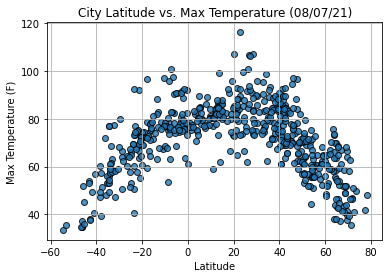

In [14]:
# Build Scatter plot for latitude vs. temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=.8, label="Cities")

#Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig1.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

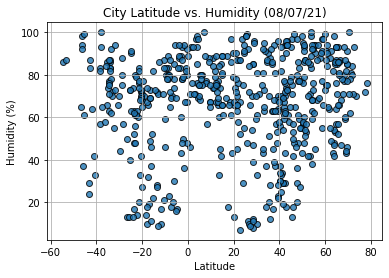

In [15]:
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidth=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig2.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

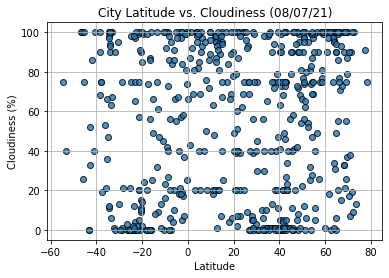

In [16]:
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidth=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig3.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

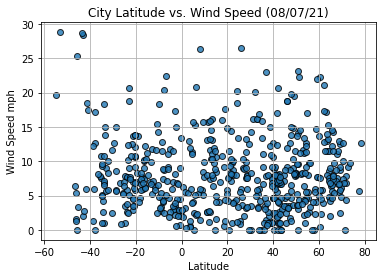

In [17]:
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidth=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig4.png")

# Show Plot
plt.show()

## Linear Regression

In [18]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = " y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()

In [19]:
#Create northern and southern hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.6795902469691284


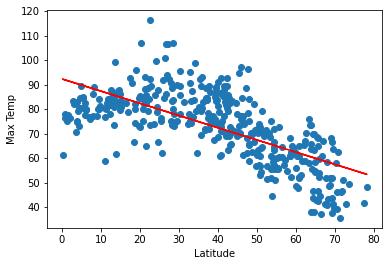

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

In [ ]:
Findings: As the latitude increases in this hemisphere, the max temperature generally goes down. 
This is an inverse relationship

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7809870832467181


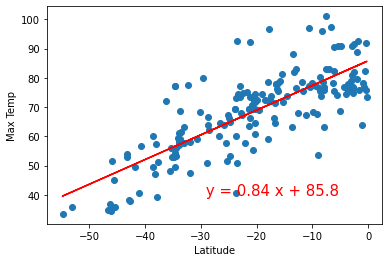

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

In [ ]:
Findings: As the latitude in southern hemisphere reaches closer to 0, the max temp is higher.
A positive relationship due to being closer to equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02086633083057458


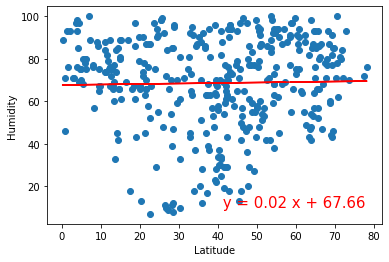

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

In [ ]:
Findings: Humidity is all over the place in these findings for the northern hemisphere.
It can be said that it is generally higher in most places.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.09893262147545938


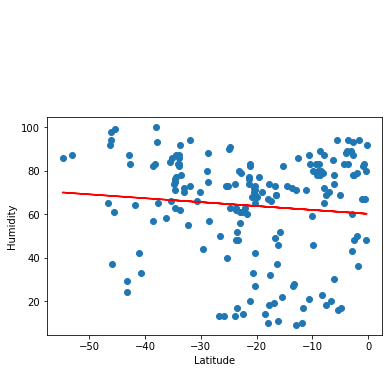

In [23]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

In [ ]:
Findings: Humidity is all over the place in these findings for the northern hemisphere.
It can be said that it is generally higher in most places.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.007146067687532318


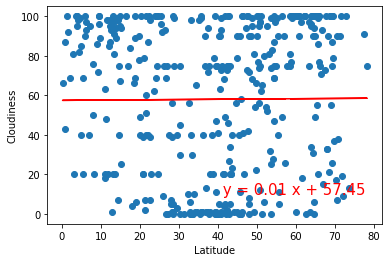

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

In [ ]:
Findings: While cloudiness is all over the place in relation to latitude,
it is typically very high or very low in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.04635350265702395


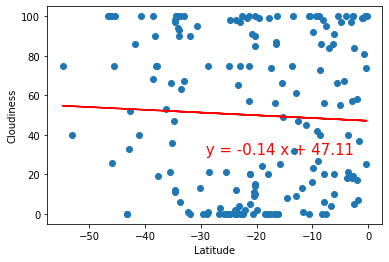

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [ ]:
Findings: While cloudiness is all over the place in relation to latitude,
it is typically very high or very low in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.052621196863945625


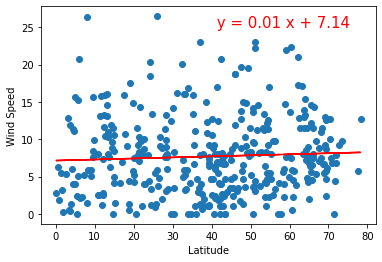

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

In [ ]:
Findings: There is very little positive correlation in wind speed with regards to latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.20065016504660968


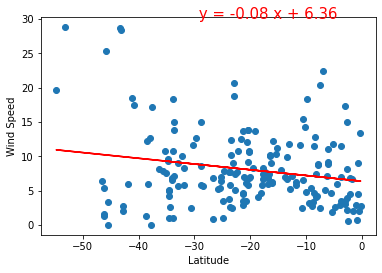

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

In [ ]:
Findings: There is very little negative correlation in wind speed with regards to latitude. 